Original Dataset with Missing Values:
                Value
Date                
2025-01-01 -0.011074
2025-01-02  0.301127
2025-01-03  0.356954
2025-01-04  0.437070
2025-01-05  0.369839

Dataset After Forward Fill:
                Value
Date                
2025-01-01 -0.011074
2025-01-02  0.301127
2025-01-03  0.356954
2025-01-04  0.437070
2025-01-05  0.369839

Dataset After Backward Fill:
                Value
Date                
2025-01-01 -0.011074
2025-01-02  0.301127
2025-01-03  0.356954
2025-01-04  0.437070
2025-01-05  0.369839

Dataset After Interpolation:
                Value  Normalized_Value
Date                                  
2025-01-01 -0.011074          0.455536
2025-01-02  0.301127          0.592192
2025-01-03  0.356954          0.616629
2025-01-04  0.437070          0.651698
2025-01-05  0.369839          0.622269

Resampled Data (Weekly):
                Value
Date                
2025-01-05  0.290783
2025-01-12  0.661113
2025-01-19  1.016131
2025-01-26  0.694525
20

<ipython-input-1-322d959e87d8>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
<ipython-input-1-322d959e87d8>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


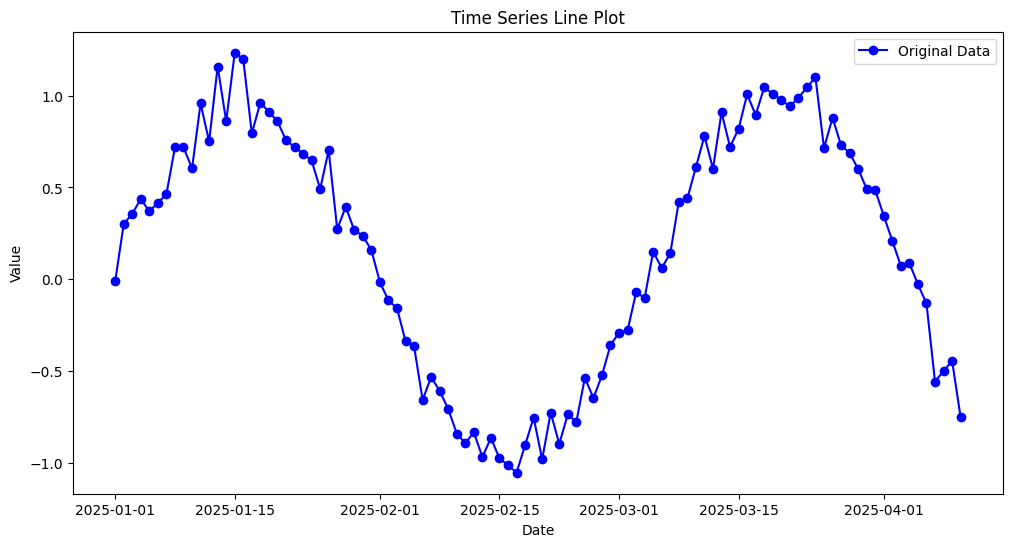

<ipython-input-1-322d959e87d8>:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_bar = df.resample('M').mean()


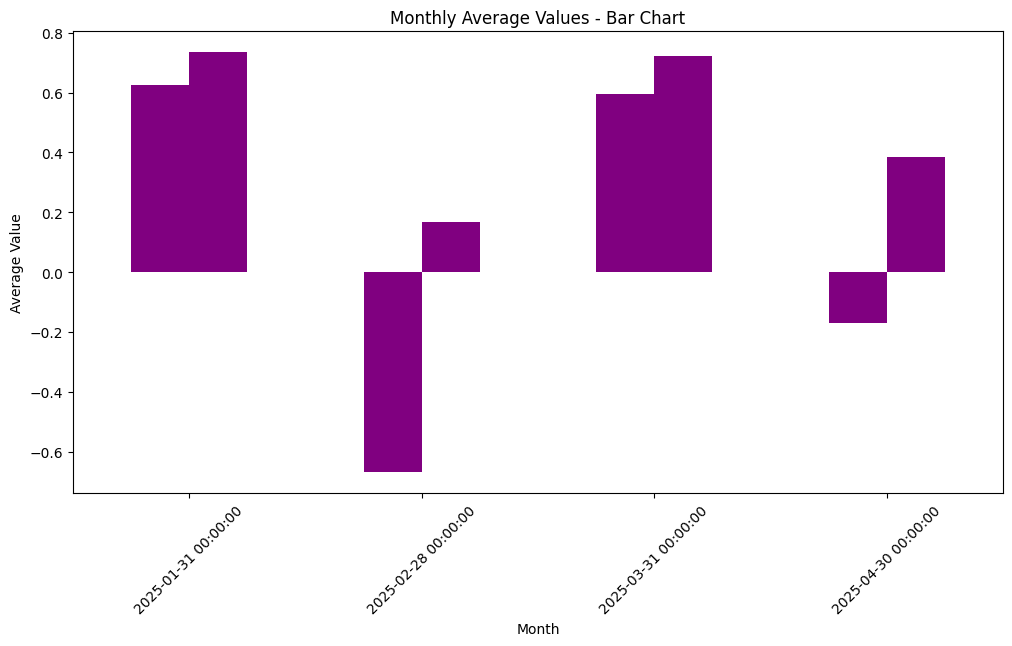

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller

# Step 1: Generating a synthetic time series dataset with missing values
def generate_time_series_data():
    date_range = pd.date_range(start='2025-01-01', periods=100, freq='D')
    data = np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.1, 100)  # Sinusoidal pattern with noise
    data[np.random.randint(0, 100, 10)] = np.nan  # Introduce missing values
    return pd.DataFrame({'Date': date_range, 'Value': data}).set_index('Date')

# Step 2: Handling Missing Data
def handle_missing_data(df):
    df_ffill = df.fillna(method='ffill')
    df_bfill = df.fillna(method='bfill')
    df_interpolated = df.interpolate(method='linear')
    return df_ffill, df_bfill, df_interpolated

# Step 3: Preprocessing Techniques
def preprocess_time_series(df):
    df_resampled = df.resample('W').mean()  # Weekly resampling
    scaler = MinMaxScaler()
    df['Normalized_Value'] = scaler.fit_transform(df[['Value']])
    return df_resampled, df

# Step 4: Checking Stationarity
def check_stationarity(df):
    result = adfuller(df['Value'].dropna())
    print("\nAugmented Dickey-Fuller Test Results:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is non-stationary.")

# Step 5: Visualizing Time Series Data
def visualize_time_series(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Value'], marker='o', linestyle='-', color='blue', label='Original Data')
    plt.title("Time Series Line Plot")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.show()



    df_bar = df.resample('M').mean()
    df_bar.plot(kind='bar', figsize=(12, 6), legend=False, color='purple')
    plt.title("Monthly Average Values - Bar Chart")
    plt.xlabel("Month")
    plt.ylabel("Average Value")
    plt.xticks(rotation=45)
    plt.show()

# Step 6: Running the program
def main():
    df = generate_time_series_data()
    print("Original Dataset with Missing Values:\n", df.head())

    df_ffill, df_bfill, df_interpolated = handle_missing_data(df)
    df_resampled, df_normalized = preprocess_time_series(df_interpolated)

    print("\nDataset After Forward Fill:\n", df_ffill.head())
    print("\nDataset After Backward Fill:\n", df_bfill.head())
    print("\nDataset After Interpolation:\n", df_interpolated.head())
    print("\nResampled Data (Weekly):\n", df_resampled.head())
    print("\nNormalized Data:\n", df_normalized.head())

    check_stationarity(df_interpolated)
    visualize_time_series(df_interpolated)


# Execute the program
if __name__ == "__main__":
    main()
